#GROUP- 2
Aman Agarwal-22PGDM081
Kiran Kumari Das- 22PGDM099
Pratik Ghosh- 22PGDM112
Ritankar Maity- 22PGDM042
Samiksha Jaisdwal- 22PGDM198
Souparna Das-22PGDM213

In [30]:
#importing libraries
import pandas as pd

# Reading the data set

In [2]:
df = pd.read_csv(r"C:\Users\jaisw\OneDrive\Desktop\Case7.csv")

In [3]:
df.head()

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,CUS1,25,5,Urban,Female
1,CUS2,30,10,Urban,Male
2,CUS3,25,8,Rural,Female
3,CUS4,35,15,Rural,Female
4,CUS5,45,20,Urban,Female


In [4]:
#dropping the column not needed for the analysis
df.drop(['CustomerID'],axis=1,inplace=True) #in our analysis we donot need CustomerID

# Encoding the categorical variables

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
df['Gender']=le.fit_transform(df['Gender']) #performin labelencoding on gender

In [8]:
df['Demography']=le.fit_transform(df['Demography']) #performin labelencoding on demography

In [9]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,25,5,1,0
1,30,10,1,1
2,25,8,0,0
3,35,15,0,0
4,45,20,1,0


In [10]:
df2=df.copy()

# Peforming standard scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
df['Age']=sc.fit_transform(df[['Age']]) #performing standard scaling on age
df['Income (INR) (in lakhs per annum)']=sc.fit_transform(df[['Income (INR) (in lakhs per annum)']]) #performing standard scaling on Income (INR) (in lakhs per annum) 

In [14]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,-0.881917,-1.166880,1,0
1,-0.377964,-0.286216,1,1
2,-0.881917,-0.638482,0,0
3,0.125988,0.594448,0,0
4,1.133893,1.475113,1,0


In [18]:
df.shape

(8, 4)

# KMeans Calculation

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

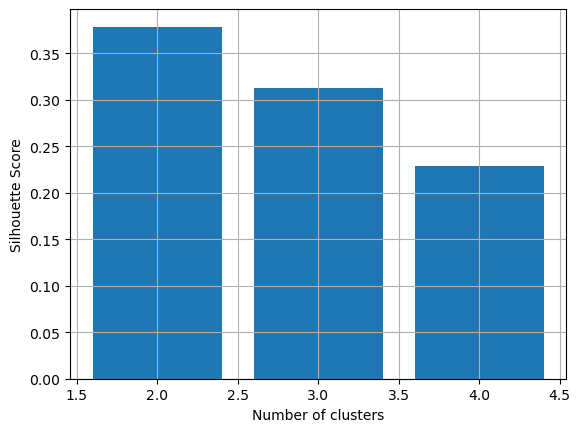

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,5):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


#Reference: https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation
#Other criteria for checking: https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation

In [20]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
clusters

array([0, 0, 0, 1, 1, 0, 1, 1])

In [22]:
df["Cluster"] = clusters

In [23]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender,Cluster
0,-0.881917,-1.166880,1,0,0
1,-0.377964,-0.286216,1,1,0
2,-0.881917,-0.638482,0,0,0
3,0.125988,0.594448,0,0,1
4,1.133893,1.475113,1,0,1


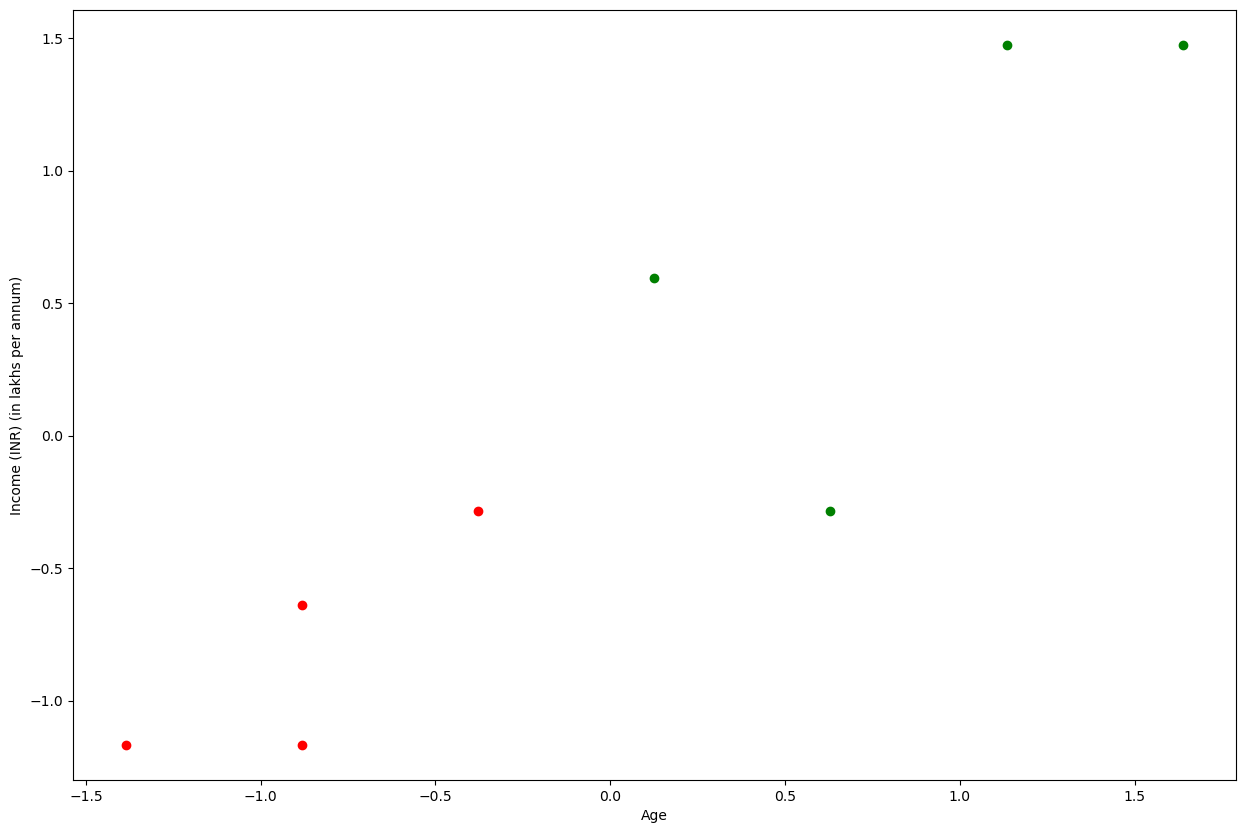

In [26]:
# Plot data after k = 2 clustering

plt.figure(figsize = (15, 10))
plt.scatter(df["Age"][df["Cluster"] == 0], df["Income (INR) (in lakhs per annum)"][df["Cluster"] == 0], color = "red")
plt.scatter(df["Age"][df["Cluster"] == 1],df["Income (INR) (in lakhs per annum)"][df["Cluster"] == 1], color = "green")
plt.xlabel('Age')
plt.ylabel('Income (INR) (in lakhs per annum)')
plt.show()

In [27]:
kmeans.cluster_centers_

array([[-0.8819171 , -0.81461445,  0.75      ,  0.5       ],
       [ 0.8819171 ,  0.81461445,  0.75      ,  0.25      ]])

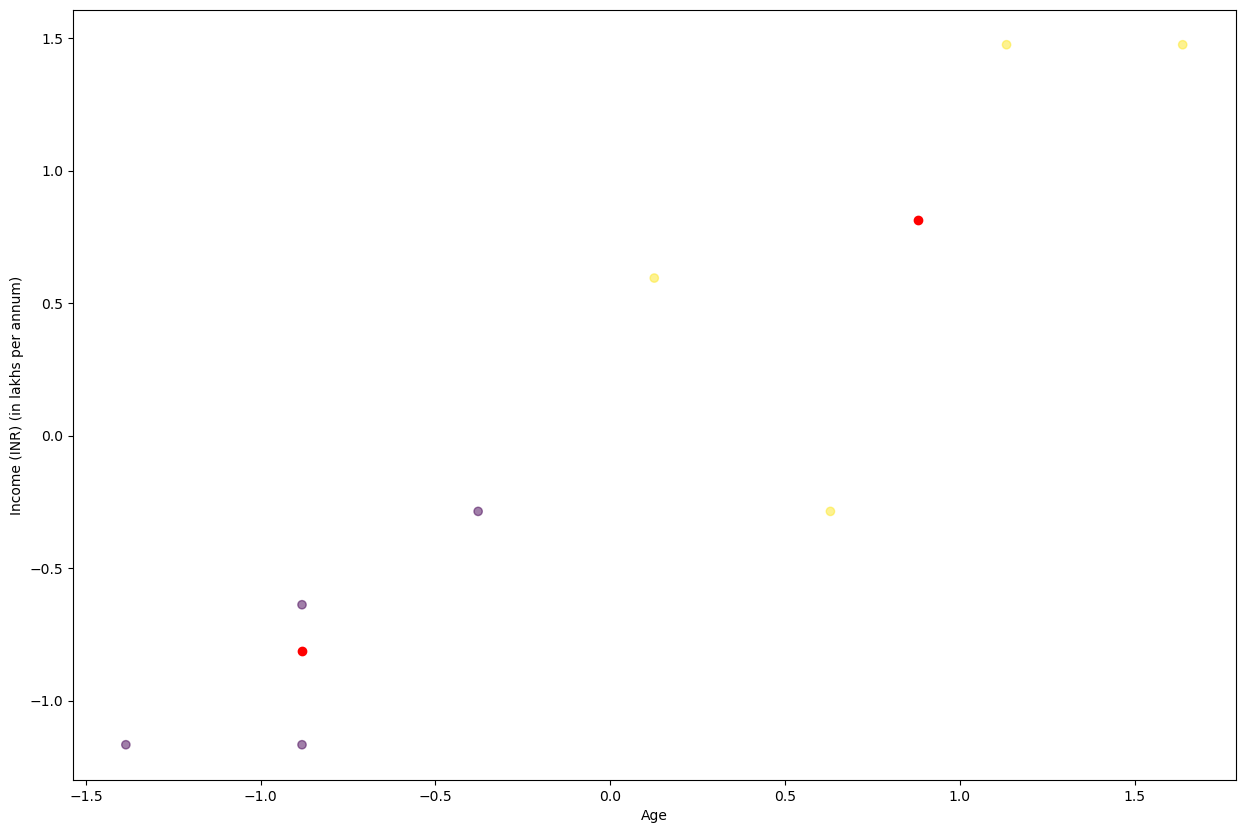

In [29]:
# Data centroids middle of clustered scatters

plt.figure(figsize = (15, 10))
plt.scatter(df["Age"], df["Income (INR) (in lakhs per annum)"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('Age')
plt.ylabel('Income (INR) (in lakhs per annum)')
plt.show()